In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML

In [2]:
#unpivoting, cleaning things up, and isolating Ohio cities

df = pd.read_csv('https://raw.githubusercontent.com/cestastanford/historical-us-city-populations/master/data/1790-2010_MASTER.csv')
df_oh = df[df.ST=='OH']
df_oh = pd.melt(df_oh,id_vars=['City'], value_vars=['1790', '1800', '1810', '1820', '1830', '1840', '1850', '1860', '1870', '1880', '1890', '1900', '1910', '1920', '1930', '1940', '1950', '1960', '1970', '1980', '1990', '2000', '2010'])
df_oh = df_oh[df_oh.value > 0]
df_oh['rank'] = df_oh.groupby("variable")["value"].rank("dense", ascending=False)
df_oh = df_oh.astype({'rank': 'int32'})
df_oh = df_oh.rename(columns={"variable": "Year", "value": "Population"})
df_oh = df_oh.astype({'Year': 'int32'})
df_oh['State'] = 'OH'
df_oh.head(25)

,City,Year,Population,rank,State
844,Cincinnati,1810,2540.0,1,OH
862,Dayton,1810,400.0,2,OH
1234,Cincinnati,1820,9642.0,1,OH
1237,Cleveland,1820,600.0,3,OH
1252,Dayton,1820,1000.0,2,OH
1623,Chillecothe,1830,2846.0,5,OH
1624,Cincinnati,1830,24831.0,1,OH
1627,Cleveland,1830,1100.0,7,OH
1634,Columbus,1830,2400.0,6,OH
1642,Dayton,1830,2950.0,3,OH


In [3]:
#test - does it look right?

current_year = 2000
dff = (df_oh[df_oh['Year'].eq(current_year)]
       .sort_values(by='Population', ascending=False)
       .head(10))
dff

,City,Year,Population,rank,State
8264,Columbus,2000,711470.0,1,OH
8257,Cleveland,2000,478403.0,2,OH
8254,Cincinnati,2000,331285.0,3,OH
8520,Toledo,2000,313619.0,4,OH
8191,Akron,2000,217074.0,5,OH
8272,Dayton,2000,166179.0,6,OH
8455,Parma,2000,85655.0,7,OH
8576,Youngstown,2000,82026.0,8,OH
8241,Canton,2000,80806.0,9,OH
8362,Lorain,2000,68652.0,10,OH


<BarContainer object of 10 artists>

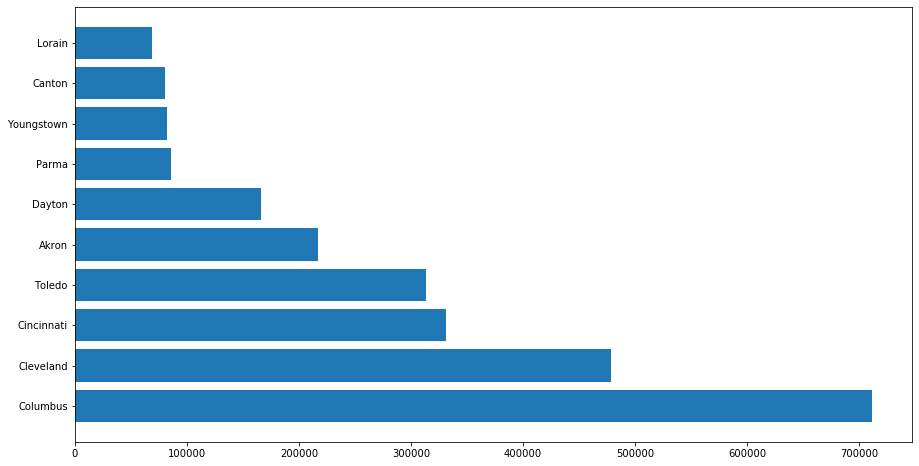

In [4]:
#test - top 10 graph

fig, ax = plt.subplots(figsize=(15, 8))
ax.barh(dff['City'], dff['Population'])

In [5]:
#get unique cities

top10cities = df_oh
is_top_10 = top10cities['rank']<11
top10cities = top10cities[is_top_10]
print(top10cities.City.unique())
print(len(top10cities.City.unique()))

['Cincinnati' 'Dayton' 'Cleveland' 'Chillecothe' 'Columbus' 'Steubenville'
 'Zanesville' 'Lancaster' 'Newark' 'Toledo' 'Portsmouth' 'Sandusky'
 'Springfield' 'Hamilton' 'Akron' 'Youngstown' 'Canton' 'Lakewood' 'Parma'
 'Lorain']
20


In [16]:
#not really relevant here

colors = dict(zip(
       ['Cincinnati', 
        'Dayton', 
        'Cleveland', 
        'Chillecothe', 
        'Columbus',
        'Steubenville', 
        'Zanesville', 
        'Lancaster', 
        'Newark', 
        'Toledo',
       'Portsmouth', 
        'Sandusky', 
        'Springfield', 
        'Hamilton', 
        'Akron',
        'Youngstown', 
        'Canton', 
        'Lakewood', 
        'Parma', 
        'Lorain'
        ],
        ['#adb0ff',
         '#ffb3ff', 
         '#90d595', 
         '#e48381',
         '#aafbff', 
         '#f7bb5f', 
         '#eafb50',
         '#F5B841',
         '#F4FF52',
         '#53FF45',
         '#1E2EDE',
         '#A846A0',
         '#4392F1',
         '#ECE8EF',
         '#DACC3E',
         '#7FB7BE',
         '#0F5257',
         '#9C92A3',
         '#D6D3F0',
         '#214353',
         ]
))
df_oh['Color'] = df_oh['City'].map(colors)
dff['Color'] = dff['City'].map(colors)
df_oh.head(25)

C:\Users\kverhoff\Python\Python37\lib\site-packages\ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,City,Year,Population,rank,State,Color
844,Cincinnati,1810,2540.0,1,OH,#adb0ff
862,Dayton,1810,400.0,2,OH,#ffb3ff
1234,Cincinnati,1820,9642.0,1,OH,#adb0ff
1237,Cleveland,1820,600.0,3,OH,#90d595
1252,Dayton,1820,1000.0,2,OH,#ffb3ff
1623,Chillecothe,1830,2846.0,5,OH,#e48381
1624,Cincinnati,1830,24831.0,1,OH,#adb0ff
1627,Cleveland,1830,1100.0,7,OH,#90d595
1634,Columbus,1830,2400.0,6,OH,#aafbff
1642,Dayton,1830,2950.0,3,OH,#ffb3ff


NameError: name 'group_lk' is not defined

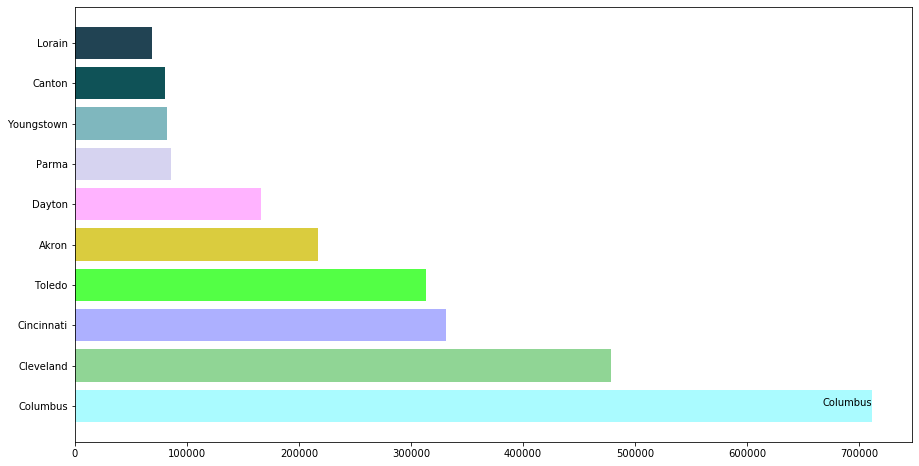

In [17]:
#make it pretty

fig, ax = plt.subplots(figsize=(15, 8))
dff = dff[::-1]   # flip values from top to bottom
# pass colors values to `color=`
ax.barh(dff['City'], dff['Population'], 
        color=dff['Color']
       )
# iterate over the values to plot labels and values (Tokyo, Asia, 38194.2)
for i, (value, name) in enumerate(zip(dff['Population'], dff['City'])):
    ax.text(value, i,     name,            ha='right')  # Tokyo: name
    ax.text(value, i-.25, group_lk[name],  ha='right')  # Asia: group name
    ax.text(value, i,     value,           ha='left')   # 38194.2: value
# Add year right middle portion of canvas
ax.text(1, 0.4, current_year, transform=ax.transAxes, size=46, ha='right')

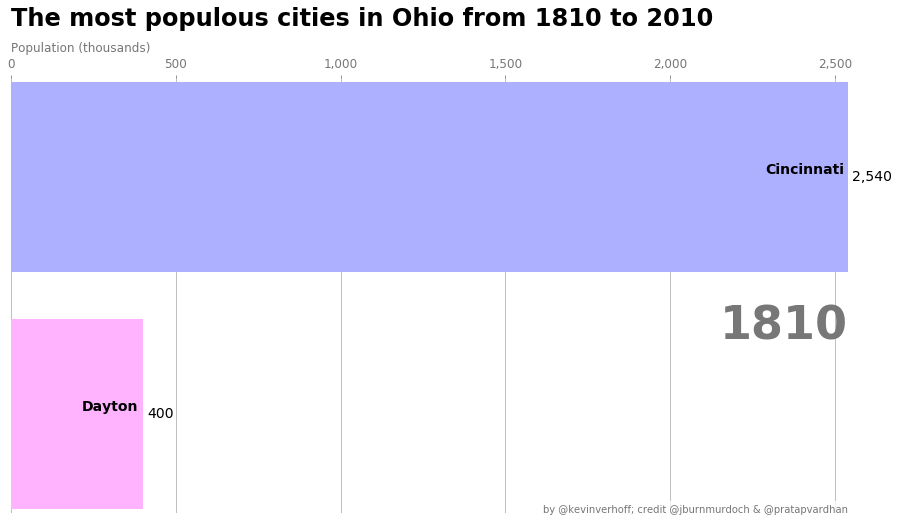

In [8]:
current_year = 1790
fig, ax = plt.subplots(figsize=(15, 8))
def draw_barchart(year):
    dff = df_oh[df_oh['Year'].eq(year)].sort_values(by='Population', ascending=True).tail(10)
    ax.clear()
    ax.barh(dff['City'], dff['Population']
            ,color=dff['Color']
           )
    dx = dff['Population'].max() / 200
    for i, (value, name) in enumerate(zip(dff['Population'], dff['City'])):
        ax.text(value-dx, i,     name,           size=14, weight=600, ha='right', va='bottom')
      #  ax.text(value-dx, i-.25, dff['State'], size=10, color='#444444', ha='right', va='baseline')
        ax.text(value+dx, i,     f'{value:,.0f}',  size=14, ha='left',  va='center')
    # ... polished styles
    ax.text(1, 0.4, year, transform=ax.transAxes, color='#777777', size=46, ha='right', weight=800)
    ax.text(0, 1.06, 'Population (thousands)', transform=ax.transAxes, size=12, color='#777777')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0, 1.12, 'The most populous cities in Ohio from 1810 to 2010',
            transform=ax.transAxes, size=24, weight=600, ha='left')
    ax.text(1, 0, 'by @kevinverhoff; credit @jburnmurdoch & @pratapvardhan', transform=ax.transAxes, ha='right',
            color='#777777', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    plt.box(False)
  
draw_barchart(1810)


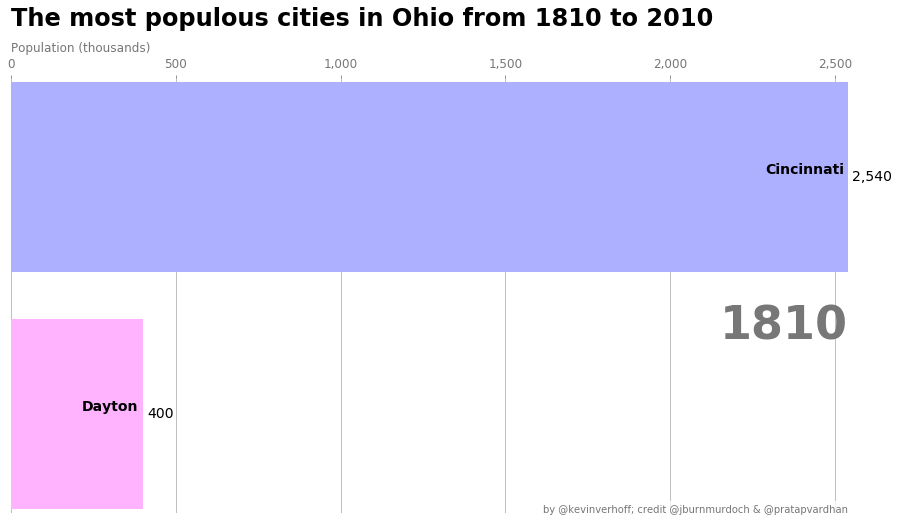

In [9]:
import matplotlib.animation as animation
from IPython.display import HTML
fig, ax = plt.subplots(figsize=(15, 8))
animator = animation.FuncAnimation(fig, draw_barchart, frames=[1810, 1820, 1830, 1840, 1850, 1860, 1870, 1880, 1890, 1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010])
HTML(animator.to_jshtml()) 
# or use animator.to_html5_video() or animator.save()

<IPython.core.display.HTML object>

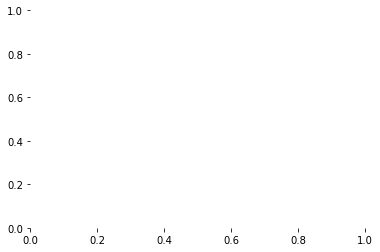

In [10]:
#save video - frame rate = 1 fps)

HTML(animator.save('ohio_cities_population_race.mp4',fps=1))

In [15]:
#gif code stolen from @michaelosthege

import imageio
import os, sys

class TargetFormat(object):
    GIF = ".gif"
    MP4 = ".mp4"
    AVI = ".avi"

def convertFile(inputpath, targetFormat):
    """Reference: http://imageio.readthedocs.io/en/latest/examples.html#convert-a-movie"""
    outputpath = os.path.splitext(inputpath)[0] + targetFormat
    print("converting\r\n\t{0}\r\nto\r\n\t{1}".format(inputpath, outputpath))

    reader = imageio.get_reader(inputpath)
    fps = reader.get_meta_data()['fps']

    writer = imageio.get_writer(outputpath, fps=fps)
    for i,im in enumerate(reader):
        sys.stdout.write("\rframe {0}".format(i))
        sys.stdout.flush()
        writer.append_data(im)
    print("\r\nFinalizing...")
    writer.close()
    print("Done.")

convertFile('ohio_cities_population_race.mp4', TargetFormat.GIF)

converting
	ohio_cities_population_race.mp4
to
	ohio_cities_population_race.gif
frame 20
Finalizing...
Done.
